# Enron Data Person of Interest Identification

## Import packages and dataset


In [265]:
# Initialize with imports
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, main, load_classifier_and_data, test_classifier

import numpy as np
import pandas as pd
import future
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

In [267]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

## Exploration

In [268]:
# Remove outliers found below
del data_dict['TOTAL']

In [269]:
# Make dict into df and print first 5 rows
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [270]:
# Print df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       145 non-null object
to_messages                  145 non-null object
deferral_payments            145 non-null object
total_payments               145 non-null object
exercised_stock_options      145 non-null object
bonus                        145 non-null object
restricted_stock             145 non-null object
shared_receipt_with_poi      145 non-null object
restricted_stock_deferred    145 non-null object
total_stock_value            145 non-null object
expenses                     145 non-null object
loan_advances                145 non-null object
from_messages                145 non-null object
other                        145 non-null object
from_this_person_to_poi      145 non-null object
poi                          145 non-null bool
director_fees                145 non-null object
deferred_income              145 non-null object


In [271]:
# Make list of all names (keys) in dict and alphabetize
names = list(df.index.values)

In [272]:
# Make list of all features (sub keys) in dict and print it
all_features = list(df.columns)
all_features

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [273]:
# Replace 'NaN' values with actual nulls
df[all_features] = df[all_features].replace('NaN', np.nan)

In [274]:
# Make list of POIs and print
pois = df[df['poi'] == True].index.tolist()
pois

['BELDEN TIMOTHY N',
 'BOWEN JR RAYMOND M',
 'CALGER CHRISTOPHER F',
 'CAUSEY RICHARD A',
 'COLWELL WESLEY',
 'DELAINEY DAVID W',
 'FASTOW ANDREW S',
 'GLISAN JR BEN F',
 'HANNON KEVIN P',
 'HIRKO JOSEPH',
 'KOENIG MARK E',
 'KOPPER MICHAEL J',
 'LAY KENNETH L',
 'RICE KENNETH D',
 'RIEKER PAULA H',
 'SHELBY REX',
 'SKILLING JEFFREY K',
 'YEAGER F SCOTT']

In [275]:
# Size of dataset
print("Number of people in dict:"), len(names)
print("Number of features in dict:"), len(all_features)
print("Number of POIs in dict:"), len(pois)

Number of people in dict: 145
Number of features in dict: 21
Number of POIs in dict: 18


In [276]:
# Find number of NaNs for each feature
df.isnull().sum()

salary                        51
to_messages                   59
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       59
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 59
other                         53
from_this_person_to_poi       59
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 34
from_poi_to_this_person       59
dtype: int64

In [277]:
# Make df with just pois and use to find number of NaNs for pois for each feature and print list
poi_df = df[df['poi'] == True]
poi_df.isnull().sum()

salary                        1
to_messages                   4
deferral_payments            13
total_payments                0
exercised_stock_options       6
bonus                         2
restricted_stock              1
shared_receipt_with_poi       4
restricted_stock_deferred    18
total_stock_value             0
expenses                      0
loan_advances                17
from_messages                 4
other                         0
from_this_person_to_poi       4
poi                           0
director_fees                18
deferred_income               7
long_term_incentive           6
email_address                 0
from_poi_to_this_person       4
dtype: int64

In [278]:
# Make df without pois
non_poi_df = df[df['poi'] == False]

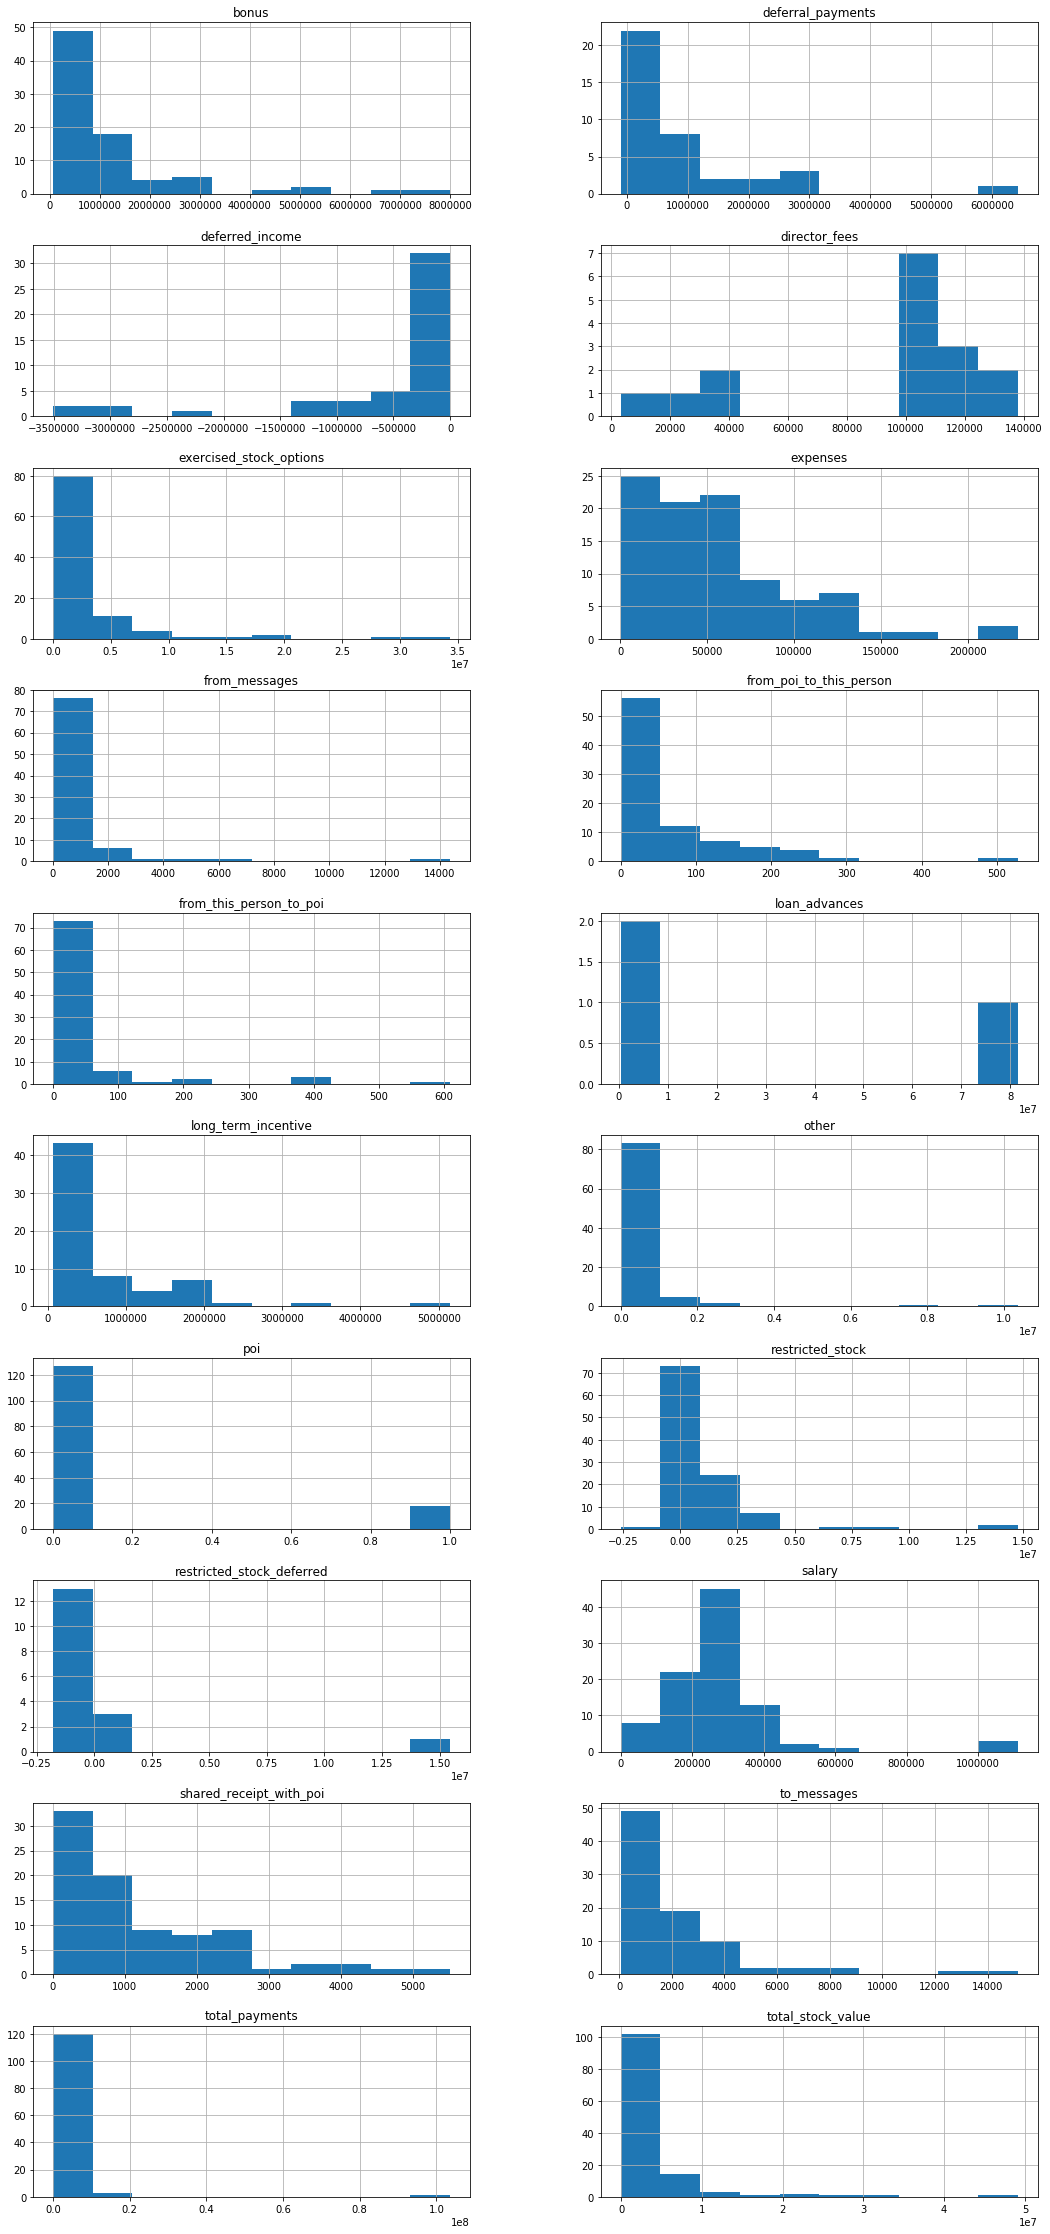

In [279]:
# Plot histograms of each features distribution
hist = df.hist(figsize=(18,40), layout=(10,2))

Data_dict contains key 'TOTAL' which is the total value for each feature and should not be included. Go back and remove this key from dict.

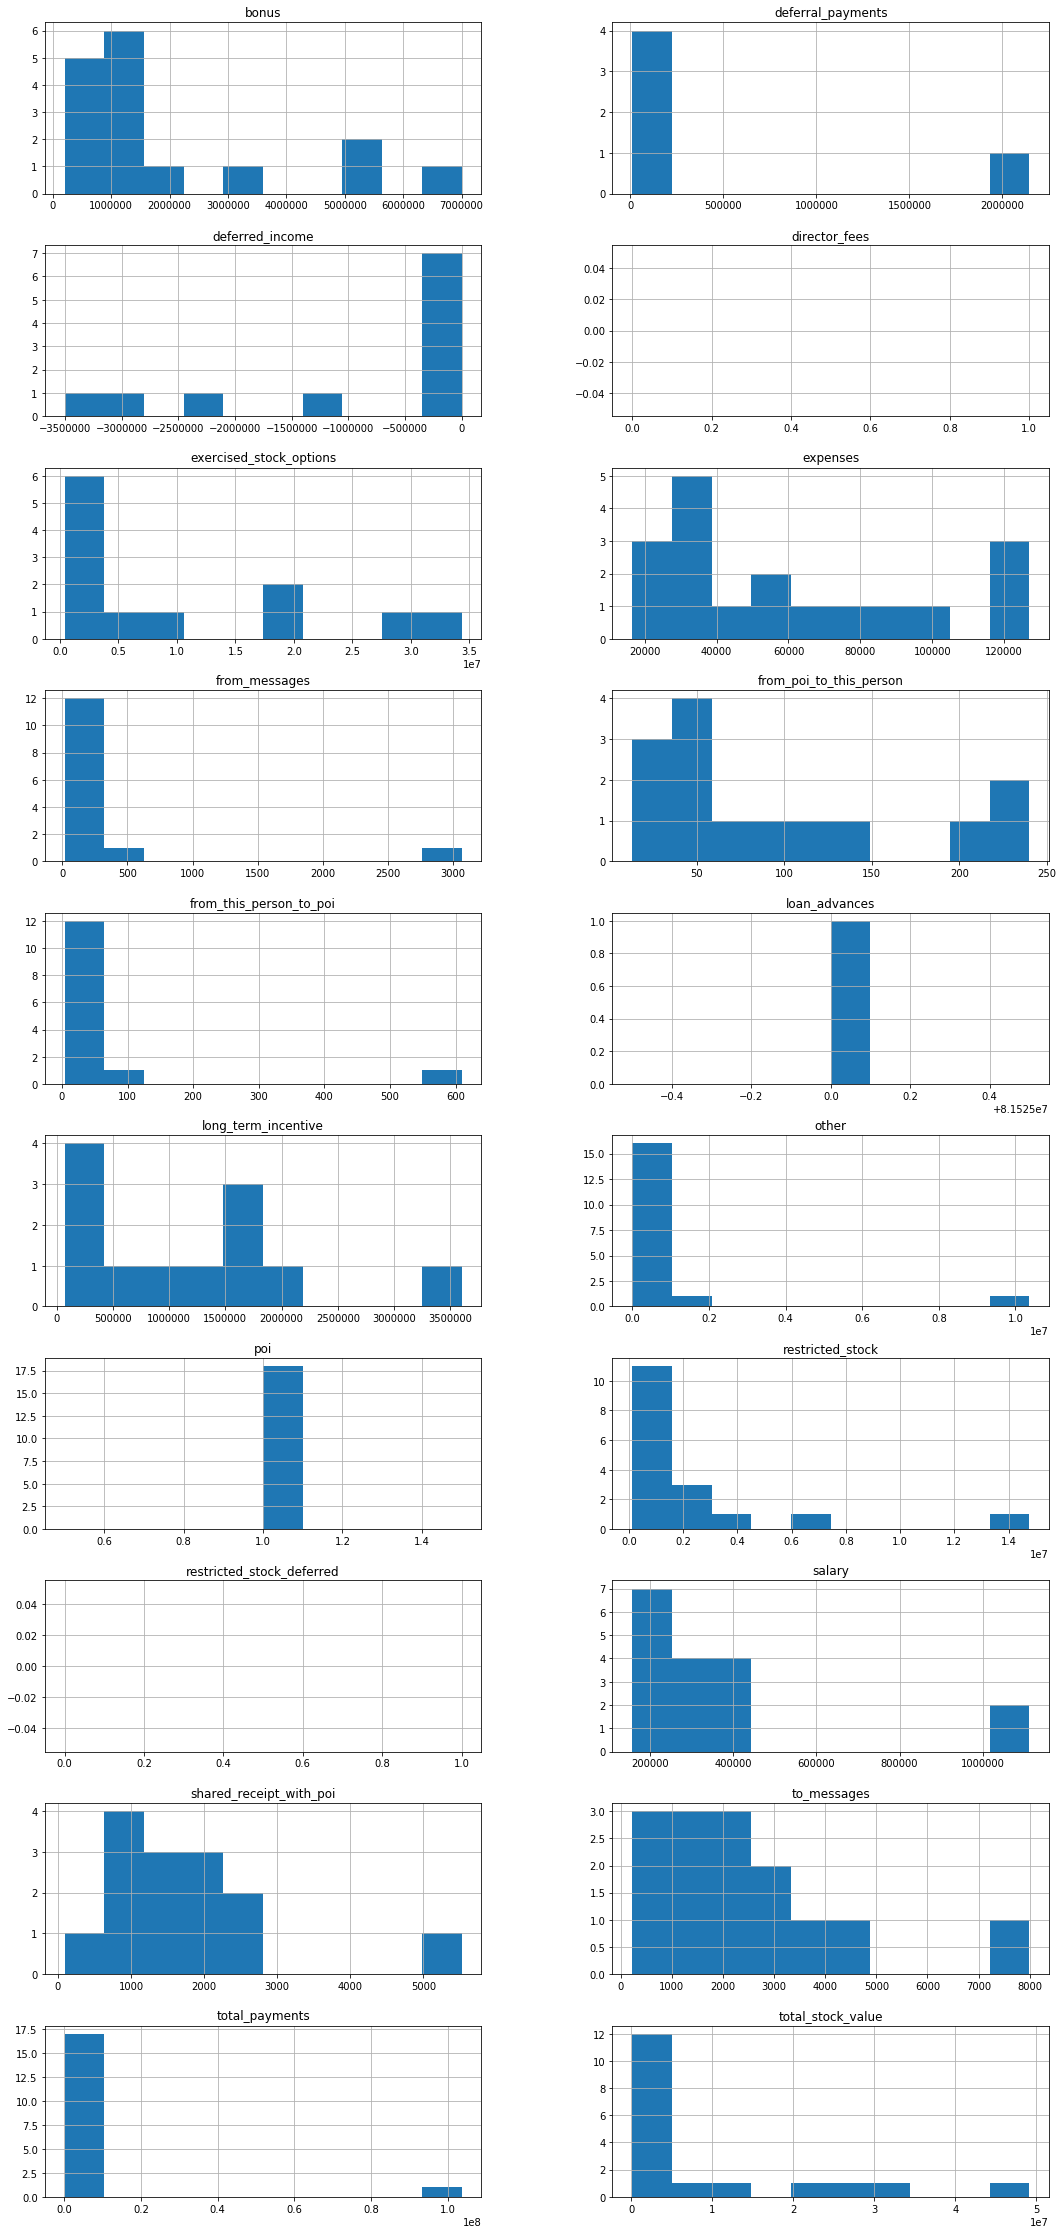

In [280]:
# Plot histograms of each features distribution for pois
hist = poi_df.hist(figsize=(18,40), layout=(10,2))

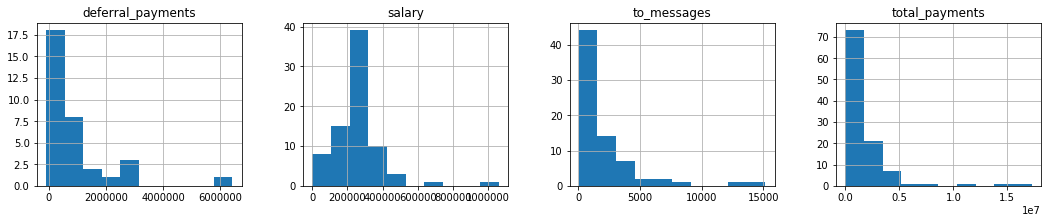

In [281]:
# Non POI
# Plot histograms of each features distribution
hist = non_poi_df.hist(column=['salary', 'to_messages', 'deferral_payments', 'total_payments'],
                       figsize=(18,3), layout=(1,4))

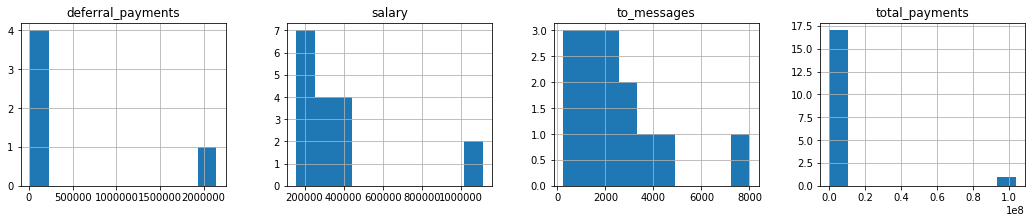

In [282]:
# POI
# Plot histograms of each features distribution
hist = poi_df.hist(column=['salary', 'to_messages', 'deferral_payments', 'total_payments'],
                       figsize=(18,3), layout=(1,4))

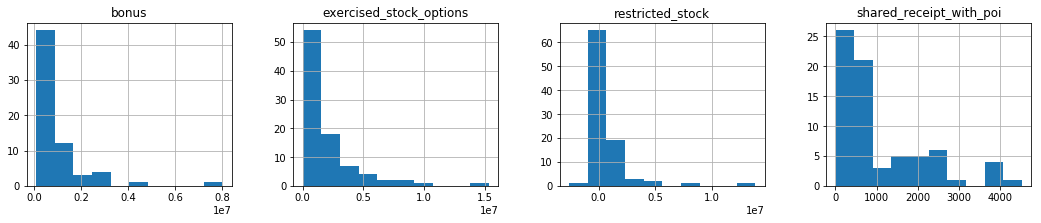

In [283]:
# Non POI
# Plot histograms of each features distribution
hist = non_poi_df.hist(column=['exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi'],
               figsize=(18,3), layout=(1,4))

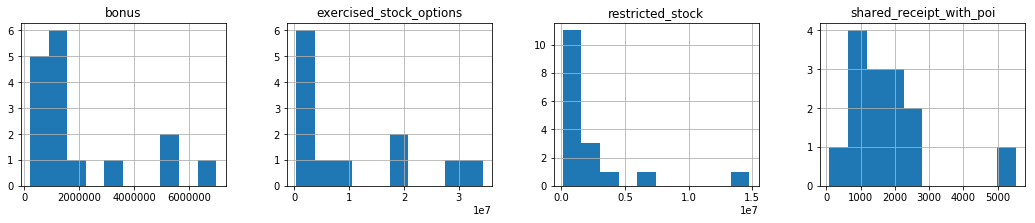

In [284]:
# POI
# Plot histograms of each features distribution
hist = poi_df.hist(column=['exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi'],
               figsize=(18,3), layout=(1,4))

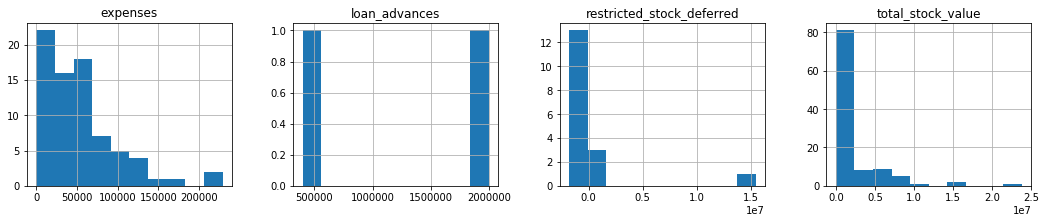

In [285]:
# Non POI
# Plot histograms of each features distribution
hist = non_poi_df.hist(column=['restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances'],
               figsize=(18,3), layout=(1,4))

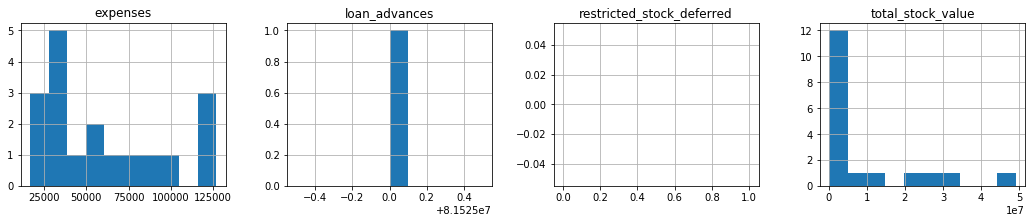

In [286]:
# POI
# Plot histograms of each features distribution
hist = poi_df.hist(column=['restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances'],
               figsize=(18,3), layout=(1,4))

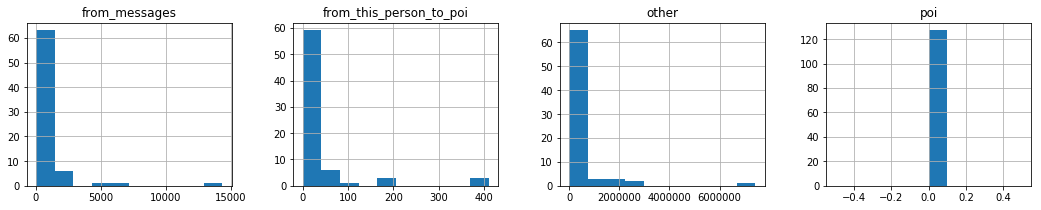

In [287]:
# Non POI
# Plot histograms of each features distribution
hist = non_poi_df.hist(column=['from_messages', 'other', 'from_this_person_to_poi', 'poi'],
               figsize=(18,3), layout=(1,4))

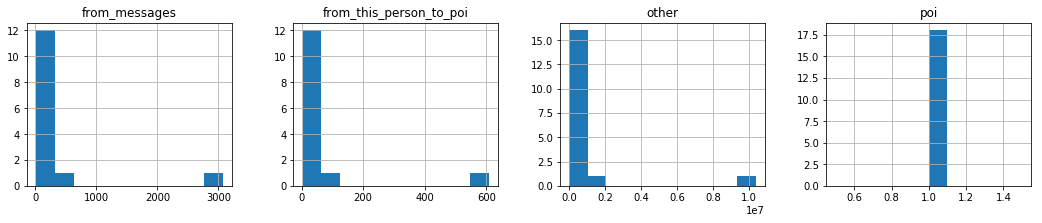

In [288]:
# POI
# Plot histograms of each features distribution
hist = poi_df.hist(column=['from_messages', 'other', 'from_this_person_to_poi', 'poi'],
               figsize=(18,3), layout=(1,4))

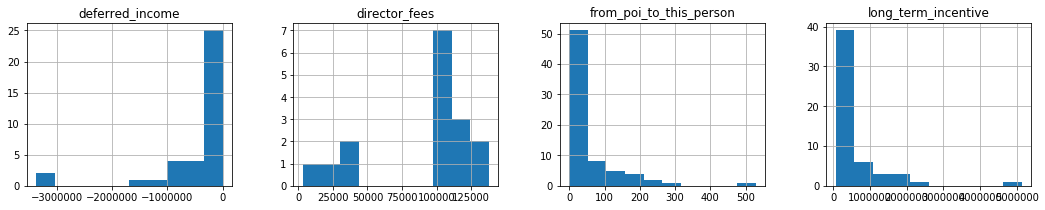

In [289]:
# Non POI
# Plot histograms of each features distribution
hist = non_poi_df.hist(column=['director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person'],
               figsize=(18,3), layout=(1,4))

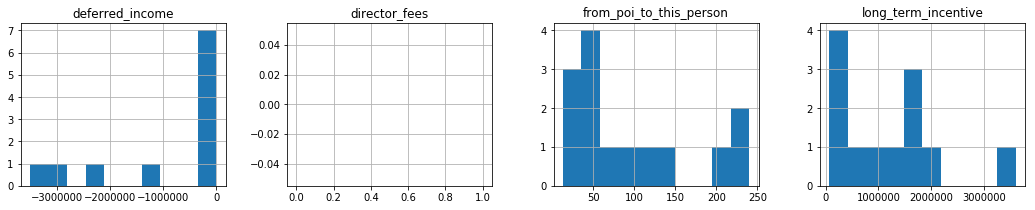

In [290]:
# POI
# Plot histograms of each features distribution
hist = poi_df.hist(column=['director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person'],
               figsize=(18,3), layout=(1,4))

# Feature Selection, Scaling, Engineering

In [291]:
# Make new columns in df for new features email features
df['%_from_poi'] = (df['from_poi_to_this_person'] / df['to_messages'])*100
df['%_to_poi'] = (df['from_this_person_to_poi'] / df['from_messages'])*100
df['%_shared_receipt_with_poi'] = (df['shared_receipt_with_poi'] / df['to_messages'])*100

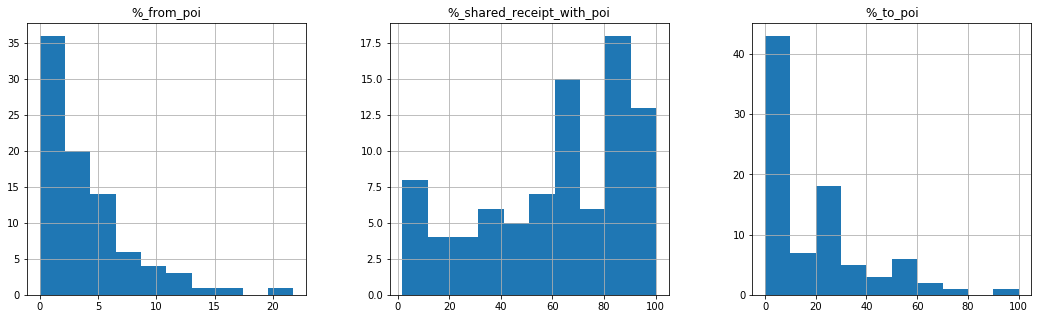

In [292]:
# Plot histograms of each new features distribution
hist = df.hist(column=['%_from_poi', '%_to_poi', '%_shared_receipt_with_poi'], figsize=(18,5), layout=(1,3))

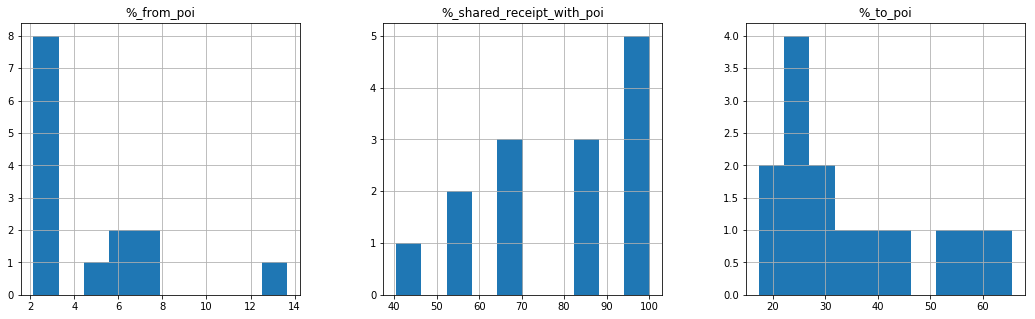

In [293]:
# Update poi_df and plot histograms of each new features distribution for pois
poi_df = df[df['poi'] == True]
hist = poi_df.hist(column=['%_from_poi', '%_to_poi', '%_shared_receipt_with_poi'], figsize=(18,5), layout=(1,3))

# Preprocessing
### Save Data to New Dict, Extract Features and Labels, Replace NaNs, Select Features, Split Training and Testing Sets, Balance Classes for Training

In [294]:
# Replace nans with medians
df = df.fillna(df.mean())

Missing values must be dealt with prior to building a classifer so imputing is used to replace any missing values with the median value for that feature. The median is used in this case rather than mean as it is less susceptible to outliers and there are known outliers in this dataset.

In [295]:
# Convert df to dict and preview
my_dataset = df.to_dict('index')

In [296]:
# Select what features to use. Features_list is a list of strings, each of which is a feature name.
# The first feature must be "poi".
features_list = ['poi','salary', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock',
                 'total_stock_value', 'expenses', 'other', 'deferred_income', 'long_term_incentive', '%_from_poi',
                 '%_to_poi', '%_shared_receipt_with_poi']

Features with absolute values (to_mesages, from_messages, from_this_person_to_poi, from_poi_to_this_person, and shared_receipt_with_poi) were dropped in favor of relative values (%_from_poi, %_to_poi, %_shared_receipt_with_poi). Features with no non-null values for pois (director_fees and restricted_stock_deferred) and features with more null than non_null values for pois (deferral_payments and loan_advances) were also dropped. The only string type feature (email_address) was dropped as well.

In [297]:
# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [298]:
# Scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

The feature values are scaled to a range of 0-1 with MinMaxScaler to deal with the variation in magnitude, sign, and units of the data. This is not necessary for many of the algorithms used, but is essential for several (those like KNN that use Euclidean distance) and should not have any negative effect for the other algorithms.

In [299]:
# Use select k best to narrow chosen features down to best 10
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10).fit(features, labels)
feat_nums = selector.get_support(indices=True)
features = selector.transform(features)

# Print scores for all features, print scores for 10 chosen features, and print names of 10 chosen features
features_array = np.array(features_list[1:])
print("All Scores:", selector.scores_)
print("Top 10 Scores:", selector.scores_[feat_nums])
print("Top 10 Features:", features_array[feat_nums])

# Make new features list
kfeatures_list = list(features_array[feat_nums])
features_list = ['poi'] + kfeatures_list

('All Scores:', array([ 9.45493049,  7.83452077, 29.30376041, 11.50541321,  6.8950336 ,
       21.60408746,  0.48146566,  1.9329649 ,  5.64377539,  6.00007939,
        1.16835001, 13.44007592,  7.89126572]))
('Top 10 Scores:', array([ 9.45493049,  7.83452077, 29.30376041, 11.50541321,  6.8950336 ,
       21.60408746,  5.64377539,  6.00007939, 13.44007592,  7.89126572]))
('Top 10 Features:', array(['salary', 'total_payments', 'exercised_stock_options', 'bonus',
       'restricted_stock', 'total_stock_value', 'deferred_income',
       'long_term_incentive', '%_to_poi', '%_shared_receipt_with_poi'],
      dtype='|S25'))


The feature set was narrowed down manually to 13 features but it can be hard to predict usefullness of a feature without the help of an algorithm. SelectKBest is used to determine the predictive potential of each remaining feature. Since there are 3 features with very low scores (less than 5) these 3 are dropped and the 10 most usefull are retained.

In [300]:
# Split training and testing data for validation
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [301]:
# Make data frames of training labels and training features, concat to single training df, set column labels to features,
# and preview result
train_ls = pd.DataFrame(labels_train)
train_fs = pd.DataFrame(features_train)
train = pd.concat([train_ls, train_fs], axis=1)
train.columns = features_list

In [302]:
# Make data frames of testing labels and testing features, concat to single testing df, set column labels to features,
# and preview result
test_ls = pd.DataFrame(labels_test)
test_fs = pd.DataFrame(features_test)
test = pd.concat([test_ls, test_fs], axis=1)
test.columns = features_list

In [303]:
# Split training df into non-pois (majority) and pois (minority), then use random upsampling on pois to balance classes,
# then recombine into one training df
df_maj = train[train.poi==0]
df_min = train[train.poi==1]

from sklearn.utils import resample

df_min_up = resample(df_min, replace = True, n_samples = len(df_maj), random_state = 0)

train = pd.concat([df_maj, df_min_up])
train = train.reset_index(drop = True)

Since there is a pretty heavy class imbalance in the data with only 18 POIs out of 145 total observations (about a 5:95 split) random upsampling is used to artificially inflate the training set with more POI observations. This balancing of classes in the training set should give better predictive power in the trained models.

In [304]:
# Make full df that contains both the upsampled training df and the testing df
full = pd.concat([train, test])
full = full.reset_index(drop = True)

# Make test fold list for GridSearchCV validation
test_fold = []

for i in range(len(train)):
    test_fold.append(-1)
    
for i in range(len(test)):
    test_fold.append(0)

When using GridSearchCV for algorithm hyperparameter tuning, there is an issue with using the default StratifiedKFold cross validation method. The K fold cross validation uses subsets of the training data to validate and optimizes hyperparameters based on the performance in predicting classification on the held out training data. In this case, that means that the "optimized" hyperparameters may not actually give the best performance on the testing data (as found when some of the "optimized" models performed worse than their default counterparts even though the default hyperparameters were included in the parameter grid). To remedy this issue, a full set of data including both the training and testing sets can be used with a predefined split for validation. To do this, a test_fold list is created with labels of -1 for training data and 0 for testing data. By giving GridSearchCV the full set and the test_fold labels, the algorithms are trained on the training data and tested on the testing data and thus the hyperparameters are actually tuned to give the best results possible on the testing set (without overfitting by including the testing set in the model training).

In [305]:
# Convert training df to dict
training_set = train.to_dict('index')

In [306]:
# Extract features and labels from training dataset
data = featureFormat(training_set, features_list, sort_keys = True)
labels_train, features_train = targetFeatureSplit(data)

In [307]:
# Convert full df to dict and preview
my_dataset = full.to_dict('index')

In [308]:
# Extract features and labels from full dataset
data = featureFormat(full_set, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

After preprocessing, the data contains no missing values, only has the 10 most usefull features, and is scaled to a range of 0-1. The data is organized as: labels_train and features_train (a training set of a features array and a labels array with classes balanced by random upsampling of the minority class), labels_test and features_test (a testing set of a features array and a labels array set aside for validation containing 30% of the original data), and features and labels (a features array and a labels array containing the combination of the training and testing sets).

# Algorithm Selection

Begin by making classifiers with default hyperparameters. Some of the more common classification algorithms will be tested including: Gaussian Naive Bayes, Random Forest, AdaBoost, Gradient Boost, Decision Tree, Logistic Regression, K Neighbors, and Support Vector Machine.

In [309]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
GNBclf = clf

('Accuracy Score:', 0.8636363636363636)
('Precision Score:', 0.25)
('Recall Score:', 0.25)
('F1 Score:', 0.25)


In [310]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
RFclf = clf

('Accuracy Score:', 0.8636363636363636)
('Precision Score:', 0.3333333333333333)
('Recall Score:', 0.5)
('F1 Score:', 0.4)


In [311]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
ABclf = clf

('Accuracy Score:', 0.8636363636363636)
('Precision Score:', 0.3333333333333333)
('Recall Score:', 0.5)
('F1 Score:', 0.4)


In [312]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
GBclf = clf

('Accuracy Score:', 0.8636363636363636)
('Precision Score:', 0.3333333333333333)
('Recall Score:', 0.5)
('F1 Score:', 0.4)


In [313]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
DTclf = clf

('Accuracy Score:', 0.8863636363636364)
('Precision Score:', 0.42857142857142855)
('Recall Score:', 0.75)
('F1 Score:', 0.5454545454545454)


In [314]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
LRclf = clf

('Accuracy Score:', 0.7727272727272727)
('Precision Score:', 0.125)
('Recall Score:', 0.25)
('F1 Score:', 0.16666666666666666)


In [315]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
KNclf = clf

('Accuracy Score:', 0.7954545454545454)
('Precision Score:', 0.2222222222222222)
('Recall Score:', 0.5)
('F1 Score:', 0.30769230769230765)


In [316]:
# Make a classifier with default parameters and predict to see initial results
from sklearn.svm import SVC

clf = SVC(random_state = 0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))
SVMclf = clf

('Accuracy Score:', 0.8409090909090909)
('Precision Score:', 0.2)
('Recall Score:', 0.25)
('F1 Score:', 0.22222222222222224)


In [317]:
# Make Lists of clfs and attributes then make into df
clfs = [GNBclf, RFclf, ABclf, GBclf, DTclf, LRclf, KNclf, SVMclf]
clf_names = ['GNBclf', 'RFclf', 'ABclf', 'GBclf', 'DTclf', 'LRclf', 'KNclf', 'SVMclf']
clf_details = [str(i) for i in clfs]
clf_acc = []
clf_pre = []
clf_rec = []
clf_f1 = []

for clf in clfs:
    clf_acc.append(accuracy_score(labels_test, clf.predict(features_test)))
    clf_pre.append(precision_score(labels_test, clf.predict(features_test)))
    clf_rec.append(recall_score(labels_test, clf.predict(features_test)))
    clf_f1.append(f1_score(labels_test, clf.predict(features_test)))

clf_df = pd.DataFrame(list(zip(clf_acc, clf_pre, clf_rec, clf_f1, clf_details)),
                      index = clf_names, columns = ['accuracy', 'precision', 'recall', 'f1', 'details'])

clf_df

,accuracy,precision,recall,f1,details
GNBclf,0.863636,0.250000,0.25,0.250000,"GaussianNB(priors=None, var_smoothing=1e-09)"
RFclf,0.863636,0.333333,0.50,0.400000,"RandomForestClassifier(bootstrap=True, class_w..."
ABclf,0.863636,0.333333,0.50,0.400000,"AdaBoostClassifier(algorithm='SAMME.R', base_e..."
GBclf,0.863636,0.333333,0.50,0.400000,GradientBoostingClassifier(criterion='friedman...
DTclf,0.886364,0.428571,0.75,0.545455,"DecisionTreeClassifier(class_weight=None, crit..."
LRclf,0.772727,0.125000,0.25,0.166667,"LogisticRegression(C=1.0, class_weight=None, d..."
KNclf,0.795455,0.222222,0.50,0.307692,"KNeighborsClassifier(algorithm='auto', leaf_si..."
SVMclf,0.840909,0.200000,0.25,0.222222,"SVC(C=1.0, cache_size=200, class_weight=None, ..."


Several classifiers give pretty good results with the default hyperparameters. Gridsearchcv will be used on all to determine the optimal hyperparameters for each (except GaussianNB since there is not really anything to tune in that case).

In [318]:
# Tune Random Forest and make predictions with best clf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
scorer = 'f1'
cv = list(PredefinedSplit(test_fold = test_fold).split(features, labels))
params = {'n_estimators' : (3, 4, 5, 10, 20), 'min_samples_split' : (2, 3, 4, 5, 6), 'random_state' : np.arange(1,100)}
alg = RandomForestClassifier()
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
RFclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'min_samples_split': 2, 'n_estimators': 5, 'random_state': 46})
('Accuracy Score:', 1.0)
('Precision Score:', 1.0)
('Recall Score:', 1.0)
('F1 Score:', 1.0)


In [319]:
# Tune AdaBoost and make predictions with best clf
params = {'n_estimators' : (10, 50, 100, 500, 1000), 'learning_rate' : (0.001, 0.01, 0.1, 0.5, 1),
          'random_state' : np.arange(1,100)}
alg = AdaBoostClassifier()
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
ABclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'n_estimators': 1000, 'learning_rate': 0.001, 'random_state': 1})
('Accuracy Score:', 0.8409090909090909)
('Precision Score:', 0.3333333333333333)
('Recall Score:', 0.75)
('F1 Score:', 0.46153846153846156)


In [320]:
# Tune Decision Tree and make predictions with best clf
params = {'min_samples_split' : (np.arange(2,11)), 'random_state' : np.arange(1,100)}
alg = DecisionTreeClassifier()
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
DTclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'min_samples_split': 2, 'random_state': 3})
('Accuracy Score:', 1.0)
('Precision Score:', 1.0)
('Recall Score:', 1.0)
('F1 Score:', 1.0)


In [321]:
# Tune Gradient Boost and make predictions with best clf
params = {'n_estimators' : (10, 50, 100, 200, 500), 'learning_rate' : (0.0001, 0.001, 0.01, 0.1, 0.5, 1),
          'random_state' : np.arange(1,100)}
alg = GradientBoostingClassifier()
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
GBclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'n_estimators': 10, 'learning_rate': 1, 'random_state': 1})
('Accuracy Score:', 1.0)
('Precision Score:', 1.0)
('Recall Score:', 1.0)
('F1 Score:', 1.0)


In [322]:
# Tune Logistic Regression and make predictions with best clf
params = {'penalty' : ('l1', 'l2'), 'C' : (np.logspace(-4, 4, 50)), 'random_state' : np.arange(1,100)}
alg = LogisticRegression()
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
LRclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'penalty': 'l2', 'C': 0.040949150623804234, 'random_state': 1})
('Accuracy Score:', 0.9318181818181818)
('Precision Score:', 1.0)
('Recall Score:', 0.25)
('F1 Score:', 0.4)


In [323]:
# Tune KNN and make predictions with best clf
params = {'n_neighbors' : (10, 20, 30, 40), 'p' : (1, 2), 'leaf_size' : (2, 3, 4, 5, 10, 20)}
alg = KNeighborsClassifier()
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
KNclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'n_neighbors': 20, 'leaf_size': 2, 'p': 1})
('Accuracy Score:', 0.8863636363636364)
('Precision Score:', 0.4)
('Recall Score:', 0.5)
('F1 Score:', 0.4444444444444445)


In [324]:
# Tune SVM  and make predictions with best clf
params = {'C' : (0.1, 1, 10, 100), 'kernel' : ('rbf', 'linear', 'poly', 'sigmoid'),
          'gamma' : ('auto', 0.01, 1, 10)}
alg = SVC(random_state = 1)
clf = GridSearchCV(alg, params, cv = cv, scoring = scorer, n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
pred = clf.predict(features_test)
SVMclf = clf
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Best Parameters:', {'kernel': 'rbf', 'C': 0.1, 'gamma': 'auto'})
('Accuracy Score:', 0.9090909090909091)
('Precision Score:', 0.0)
('Recall Score:', 0.0)
('F1 Score:', 0.0)


In [325]:
# Make Lists of clfs and attributes then make into df for F1 optimized clfs
clfs = [GNBclf, RFclf, ABclf, GBclf, DTclf, LRclf, KNclf, SVMclf]
clf_names = ['GNBclf', 'RFclf', 'ABclf', 'GBclf', 'DTclf', 'LRclf', 'KNclf', 'SVMclf']
clf_details = [str(i) for i in clfs]
clf_acc = []
clf_pre = []
clf_rec = []
clf_f1 = []

for clf in clfs:
    clf_acc.append(accuracy_score(labels_test, clf.predict(features_test)))
    clf_pre.append(precision_score(labels_test, clf.predict(features_test)))
    clf_rec.append(recall_score(labels_test, clf.predict(features_test)))
    clf_f1.append(f1_score(labels_test, clf.predict(features_test)))

clf_df = pd.DataFrame(list(zip(clf_acc, clf_pre, clf_rec, clf_f1, clf_details)),
                      index = clf_names, columns = ['accuracy', 'precision', 'recall', 'f1', 'details'])

clf_df

,accuracy,precision,recall,f1,details
GNBclf,0.863636,0.250000,0.25,0.250000,"GaussianNB(priors=None, var_smoothing=1e-09)"
RFclf,1.000000,1.000000,1.00,1.000000,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."
ABclf,0.840909,0.333333,0.75,0.461538,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."
GBclf,1.000000,1.000000,1.00,1.000000,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."
DTclf,1.000000,1.000000,1.00,1.000000,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."
LRclf,0.931818,1.000000,0.25,0.400000,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."
KNclf,0.886364,0.400000,0.50,0.444444,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."
SVMclf,0.909091,0.000000,0.00,0.000000,"GridSearchCV(cv=[(array([ 0, 1, ..., 172, 1..."


The Random Forest and Decision Tree classifiers give the best results durring the gridsearchcv optimization so these two classifiers with optimized hyperparameters will be tested under normal conditions.

In [326]:
# Make a Decision Tree classifier with optimized parameters and test
clf = DecisionTreeClassifier(random_state = 3, min_samples_split = 2)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Accuracy Score:', 0.8863636363636364)
('Precision Score:', 0.42857142857142855)
('Recall Score:', 0.75)
('F1 Score:', 0.5454545454545454)


In [327]:
# Make a Gradient Boost classifier with optimized parameters and test
clf = GradientBoostingClassifier(random_state = 1, learning_rate = 1, n_estimators = 10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Accuracy Score:', 0.9090909090909091)
('Precision Score:', 0.5)
('Recall Score:', 0.75)
('F1 Score:', 0.6)


In [328]:
# Make a Random Forest classifier with optimized parameters and test
clf = RandomForestClassifier(random_state = 46, min_samples_split = 2, n_estimators = 5)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Accuracy Score:", accuracy_score(labels_test, pred))
print("Precision Score:", precision_score(labels_test, pred))
print("Recall Score:", recall_score(labels_test, pred))
print("F1 Score:", f1_score(labels_test, pred))

('Accuracy Score:', 0.9772727272727273)
('Precision Score:', 0.8)
('Recall Score:', 1.0)
('F1 Score:', 0.888888888888889)


The Random Forest classifier with random_state = 46, min_samples_split = 2, and n_estimators = 5 gives the best results and will be the final choice of classifier.

In [329]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

# Output from Tester.py

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=46, verbose=0, warm_start=False)
            
	Accuracy: 0.93064	Precision: 0.87732	Recall: 0.96544	F1: 0.91928	F2: 0.94643
	Total predictions: 22000	True positives: 8689	False positives: 1215	False negatives:  311	True negatives: 11785